#                        Problem Statement Description
    
Subjects receiving the same vaccine often show different levels of immune responses 
and some may even present adverse side effects to the vaccine. Systems vaccinology can 
combine omics data and machine learning techniques to obtain highly predictive 
signatures of vaccine immunogenicity and reactogenicity. Currently, several machine 
learning methods are already available to researchers with no background in 
bioinformatics.
                                
Predict how likely it is that the people will take an H1N1 flu vaccine.

In [410]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
from sklearn import metrics

In [411]:
#Loading the dataset 
df=pd.read_csv('E:\Python Imarticus\Vaccine Usage Prediction\Dataset\h1n1_vaccine_prediction.csv')

In [412]:
#Copying the original dataframe to working dataframe
df1=df.copy()

# Doing Some Basic Operation of the Dataset

In [413]:
#Checking the first five rows of the dataset
print('The first two rows of the dataset')
df1.head(2)

The first two rows of the dataset


,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0


In [414]:
#Checking the last five rows of the dataset
print('The last two rows of the dataset')
df1.tail(2)

The last two rows of the dataset


,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0
26706,26706,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0


In [415]:
# Checking the shape of the dataset in the dataframe
print('The shape of the dataset :',df1.shape)

The shape of the dataset : (26707, 34)


In [416]:
#Checking the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

The dataset contain 34 columns so It will be better to seperate the column into numerical_features and Categorical_features and then understanding the data.

In [417]:
numerical_features=df1.select_dtypes(include=['int64','float64'])
categorical_features=df1.select_dtypes(include=['object'])

from the dataframe information that we have seen in the previous cell,there are missing values in the dataset that needed to be figured out

In [418]:
#Checking the missing values in the numerical_features
numerical_features.isnull().sum()/len(numerical_features)

unique_id                    0.000000
h1n1_worry                   0.003445
h1n1_awareness               0.004343
antiviral_medication         0.002658
contact_avoidance            0.007788
bought_face_mask             0.000711
wash_hands_frequently        0.001573
avoid_large_gatherings       0.003258
reduced_outside_home_cont    0.003070
avoid_touch_face             0.004793
dr_recc_h1n1_vacc            0.080878
dr_recc_seasonal_vacc        0.080878
chronic_medic_condition      0.036358
cont_child_undr_6_mnths      0.030704
is_health_worker             0.030104
has_health_insur             0.459580
is_h1n1_vacc_effective       0.014640
is_h1n1_risky                0.014528
sick_from_h1n1_vacc          0.014790
is_seas_vacc_effective       0.017299
is_seas_risky                0.019246
sick_from_seas_vacc          0.020107
no_of_adults                 0.009323
no_of_children               0.009323
h1n1_vaccine                 0.000000
dtype: float64

In [419]:
numerical_features.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine'],
      dtype='object')

In [420]:
def imputenan_value(dataframe,columns):
        dataframe=dataframe[columns].fillna(dataframe[columns].mode()[0])
        return dataframe

In [421]:
numerical_features.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine'],
      dtype='object')

In [422]:
numerical_features['h1n1_worry']=imputenan_value(numerical_features,'h1n1_worry')
numerical_features['h1n1_awareness']=imputenan_value(numerical_features,'h1n1_awareness')
numerical_features['antiviral_medication']=imputenan_value(numerical_features,'antiviral_medication')
numerical_features['contact_avoidance']=imputenan_value(numerical_features,'contact_avoidance')
numerical_features['bought_face_mask']=imputenan_value(numerical_features,'bought_face_mask')
numerical_features['wash_hands_frequently']=imputenan_value(numerical_features,'wash_hands_frequently')
numerical_features['avoid_large_gatherings']=imputenan_value(numerical_features,'avoid_large_gatherings')
numerical_features['reduced_outside_home_cont']=imputenan_value(numerical_features,'reduced_outside_home_cont')
numerical_features['avoid_touch_face']=imputenan_value(numerical_features,'avoid_touch_face')
numerical_features['dr_recc_h1n1_vacc']=imputenan_value(numerical_features,'dr_recc_h1n1_vacc')
numerical_features['dr_recc_seasonal_vacc']=imputenan_value(numerical_features,'dr_recc_seasonal_vacc')
numerical_features['chronic_medic_condition']=imputenan_value(numerical_features,'chronic_medic_condition')
numerical_features['cont_child_undr_6_mnths']=imputenan_value(numerical_features,'cont_child_undr_6_mnths')
numerical_features['is_health_worker']=imputenan_value(numerical_features,'is_health_worker')
numerical_features['has_health_insur']=imputenan_value(numerical_features,'has_health_insur')
numerical_features['is_h1n1_vacc_effective']=imputenan_value(numerical_features,'is_h1n1_vacc_effective')
numerical_features['is_h1n1_risky']=imputenan_value(numerical_features,'is_h1n1_risky')
numerical_features['sick_from_h1n1_vacc']=imputenan_value(numerical_features,'sick_from_h1n1_vacc')
numerical_features['is_seas_vacc_effective']=imputenan_value(numerical_features,'is_seas_vacc_effective')
numerical_features['is_seas_risky']=imputenan_value(numerical_features,'is_seas_risky')
numerical_features['sick_from_seas_vacc']=imputenan_value(numerical_features,'sick_from_seas_vacc')
numerical_features['no_of_adults']=imputenan_value(numerical_features,'no_of_adults')
numerical_features['no_of_children']=imputenan_value(numerical_features,'no_of_children')

<ipython-input-422-c3941d2cc78f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_features['h1n1_worry']=imputenan_value(numerical_features,'h1n1_worry')
<ipython-input-422-c3941d2cc78f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_features['h1n1_awareness']=imputenan_value(numerical_features,'h1n1_awareness')
<ipython-input-422-c3941d2cc78f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [423]:
numerical_features.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

We have sucessfully handled missing value in the dataset.Now we will move on analyzing the relation between features with target variable(i.e h1n1_vaccine)

# Now doing the EDA Part and digging deep into the data to find relation between data and other stuff

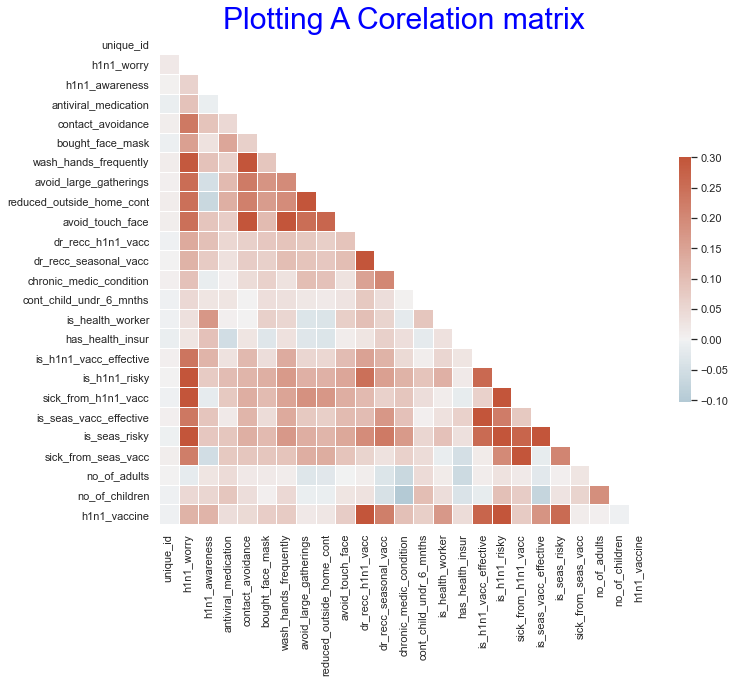

In [424]:
#Plotting A Diagonally Corelation Matrix
sns.set_theme(style="white")
# Compute the correlation matrix
corr = numerical_features.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
ax.set_title('Plotting A Corelation matrix',fontdict={'fontsize':30,'color':'blue'})
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [425]:
#Checking the columns of the dataset
numerical_features.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine'],
      dtype='object')

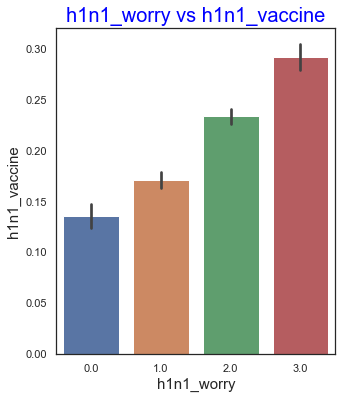

In [426]:
#has worring_factor increased the chance of person getting the h1n1_vaccine.Let see
#Worry about the h1n1 flu(0,1,2,3) 0=Not worried at all, 1=Not very worried, 2=Somewhat worried, 3=Very worried
fig,ax=plt.subplots(figsize=(5,6))
ax.set_title('h1n1_worry vs h1n1_vaccine',fontdict={'fontsize':20,'color':'blue'})
plt.xlabel(xlabel='h1n1_worry',fontdict={'fontsize':15})
plt.ylabel(ylabel='h1n1_vaccine',fontdict={'fontsize':15})
sns.barplot(x='h1n1_worry',y='h1n1_vaccine',data=numerical_features)
plt.show()

Yes the worring_factor has surely increase the chance of person getting the h1n1 vaccine.

Category 3 has 27% higher chances of getting vaccine than category 2,1 and 0 

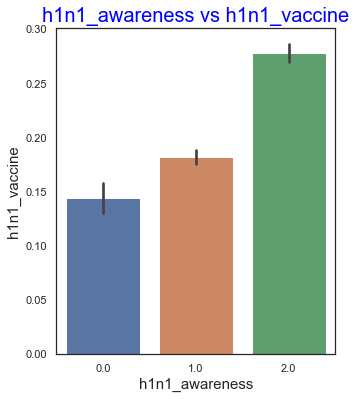

In [427]:
# has h1n1 awareness factor results in person getting vaccine or not

fig,ax=plt.subplots(figsize=(5,6))
ax.set_title('h1n1_awareness vs h1n1_vaccine',fontdict={'fontsize':20,'color':'blue'})
plt.xlabel(xlabel='h1n1_awareness',fontdict={'fontsize':15})
plt.ylabel(ylabel='h1n1_vaccine',fontdict={'fontsize':15})
sns.barplot(x='h1n1_awareness',y='h1n1_vaccine',data=numerical_features)
plt.show()

Yes the awareness_factor has surely increasing the chances of getting the person vaccinated:-

1. 28% of the knowledgable awareness has 28% higher chance of getting vaccine than category 1,0

2. Combined chance of person in category 1 and category 0 is 31% chance (which is good) considering they are not aware of it.

Now the person who is aware(h1n1_awareness) that the h1n1 disease is there will take necessary precaution so that he will  
not get the disease.

There are multiple ways to take precaution in order to avoid the disease(This are same feature we need to analyze and relate):-

1. contact_avoidance

2. bought_face_mask

3. wash_hand_frequently

4. avoid_large_gatherings 

5. reduced_outside_home_cont 

6. avoid_touch_face 

7. dr_recc_h1n1_vacc

In [428]:
#Antiviral drugs are a class of medication used for treating viral infections. 
#Most antivirals target specific viruses, while a broad-spectrum antiviral is effective against a wide range of viruses. Unlike most antibiotics, antiviral drugs do not destroy their target pathogen; instead they inhibit its development.

numerical_features['antiviral_medication'].value_counts(normalize=True)

0.0    0.951286
1.0    0.048714
Name: antiviral_medication, dtype: float64

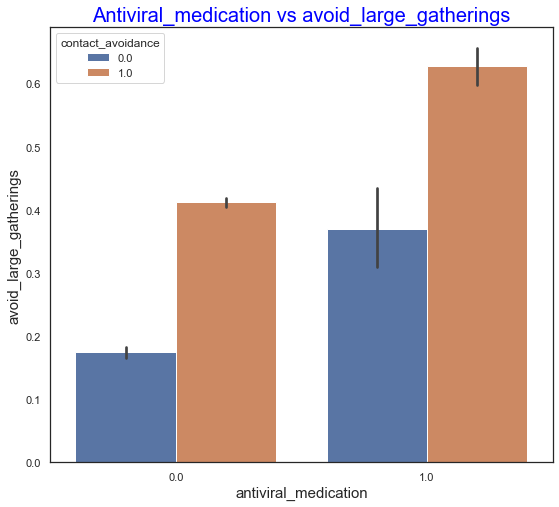

In [429]:
#The person having some viral infection and has taken antiviral medication is attending public_gathering and also contacting
#with people.Let's check
fig,ax=plt.subplots(figsize=(9,8))
ax.set_title('Antiviral_medication vs avoid_large_gatherings' ,fontdict={'fontsize':20,'color':'blue'})
plt.xlabel(xlabel='antiviral_medication',fontdict={'fontsize':15})
plt.ylabel(ylabel='avoid_large_gatherings',fontdict={'fontsize':15})
sns.barplot(x='antiviral_medication',y='avoid_large_gatherings',hue='contact_avoidance',data=numerical_features)
plt.show()

 The person taking antiviral medication is mostly avoiding the public_gathering and contacting with people(Which is very good) but
   there are still 38% people who are still contacting with people(which is bad considering they have viral infection and  can spread it)
 
Meaning they are following precaution measures and are aware about the situation around

In [430]:
numerical_features['reduced_outside_home_cont'].value_counts()

0.0    17726
1.0     8981
Name: reduced_outside_home_cont, dtype: int64

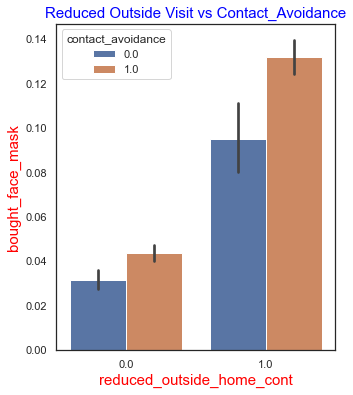

In [431]:
#reduced_outside_home_cont,avoid_touch_face
#Has avoided any close contact with people who have-contact_avoidance flu-like symptoms - (0,1)
fig,ax=plt.subplots(figsize=(5,6))
ax.set_title('Reduced Outside Visit vs Contact_Avoidance',fontdict={'fontsize':15,'color':'blue'})
plt.xlabel(xlabel='reduced_outside_home_cont',fontdict={'fontsize':15,'color':'red'})
plt.ylabel(ylabel='bought_face_mask',fontdict={'fontsize':15,'color':'red'})
ax.get_ylabel()
sns.barplot(x='reduced_outside_home_cont',y='bought_face_mask',hue='contact_avoidance',data=numerical_features,ax=ax)
ax.get_legend()
plt.show()

This is a very good insight about the data:-

1. The person who are in contact with the flu virus has bought face mask to protect themselves(which is a good thing) considering they are going  out sometimes

2. The person who are not contact with the flu virus or not going outside of their home are buying less face masks

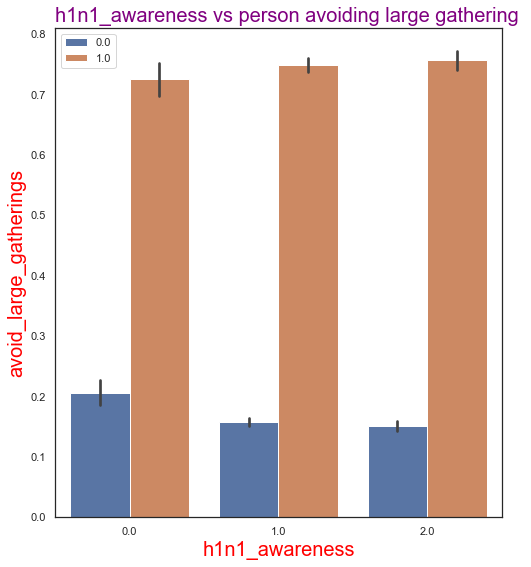

In [432]:
fig,ax=plt.subplots(figsize=(8,9))
ax.set_title('h1n1_awareness vs person avoiding large gathering ',fontdict={'fontsize':20,'color':'purple'},loc='left')
plt.xlabel(xlabel='h1n1_awareness',fontdict={'fontsize':20,'color':'red'})
plt.ylabel(ylabel='avoid_large_gatherings',fontdict={'fontsize':20,'color':'red'})
sns.barplot(x='h1n1_awareness',y='avoid_large_gatherings',hue='reduced_outside_home_cont',data=numerical_features)
plt.legend()
plt.show()

This graph show that 70% of the approximate public are avoid large gathering as well as reducing outside visit in aware of 
the h1n1 influenza virus 

In [433]:
# Checking the recommendation of the doctors to vaccinate the h1n1_vaccine(is it worth)
vaccine_recommended_by_doctors=pd.DataFrame(numerical_features.groupby('dr_recc_h1n1_vacc')['h1n1_vaccine'].value_counts(normalize=True))

In [434]:
vaccine_recommended_by_doctors

h1n1_vaccine
dr_recc_h1n1_vacc h1n1_vaccine              
0.0               0                 0.868773
                  1                 0.131227
1.0               1                 0.532359
                  0                 0.467641

After recommendation of the doctor 53% of the people got vaccinated and 12% of the people got vaccinated without going to
the doctors(may be they were aware of the situation)

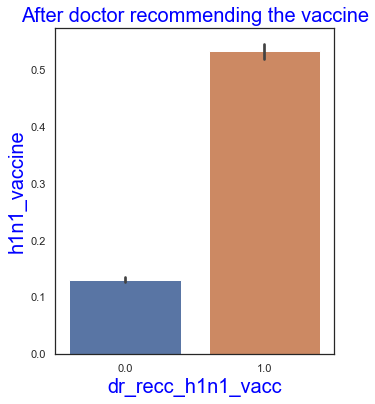

In [435]:
fig,ax=plt.subplots(figsize=(5,6))
ax.set_title('After doctor recommending the vaccine',fontdict={'fontsize':20,'color':'blue'})
plt.xlabel(xlabel='dr_recc_h1n1_vacc',fontdict={'fontsize':20,'color':'blue'})
plt.ylabel(ylabel='h1n1_vaccine',fontdict={'fontsize':20,'color':'blue'})
sns.barplot(x='dr_recc_h1n1_vacc',y='h1n1_vaccine',data=numerical_features)
plt.show()

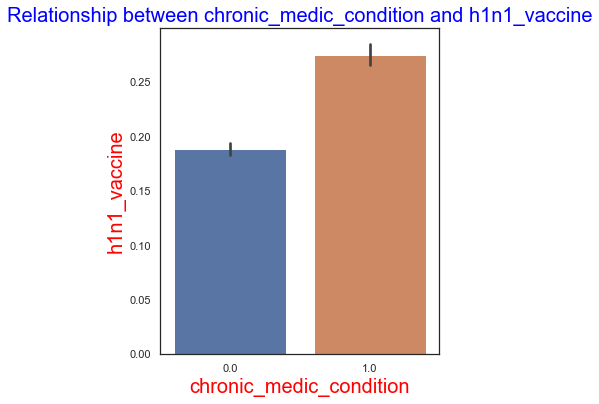

In [436]:
fig,ax=plt.subplots(figsize=(5,6))
ax.set_title('Relationship between chronic_medic_condition and h1n1_vaccine',fontdict={'fontsize':20,'color':'blue'})
plt.xlabel(xlabel='chronic_medic_condition',fontdict={'fontsize':20,'color':'red'})
plt.ylabel(ylabel='h1n1_vaccine',fontdict={'fontsize':20,'color':'red'})
sns.barplot(x='chronic_medic_condition',y='h1n1_vaccine',data=numerical_features)
plt.show()

#Relationship between chronic_medic_condition and h1n1_vaccine

25% of the chronic_medic_condition has vaccinated with the h1n1_vaccine because they are more susceptible to getting infected
with the disease

In [437]:
data_is_health_worker=pd.DataFrame(numerical_features.groupby('h1n1_vaccine')['is_health_worker'].value_counts(normalize=True))

In [438]:
data_is_health_worker

is_health_worker
h1n1_vaccine is_health_worker                  
0            0.0                       0.918604
             1.0                       0.081396
1            0.0                       0.790800
             1.0                       0.209200

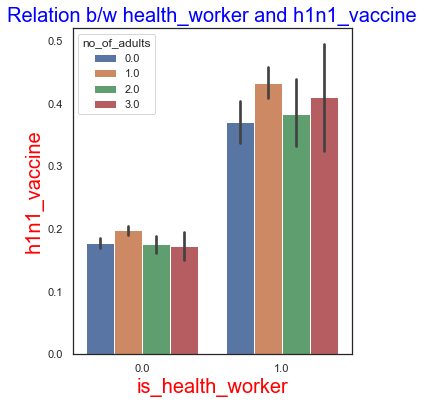

In [439]:
fig,ax=plt.subplots(figsize=(5,6))
ax.set_title('Relation b/w health_worker and h1n1_vaccine',fontdict={'fontsize':20,'color':'blue'})
plt.xlabel(xlabel='is_health_worker',fontdict={'fontsize':20,'color':'red'})
plt.ylabel(ylabel='h1n1_vaccine',fontdict={'fontsize':20,'color':'red'})
sns.barplot(x='is_health_worker',y='h1n1_vaccine',hue='no_of_adults',data=numerical_features)
plt.show()

#Relationship between health_worker and h1n1_vaccine with respect to no_of_adults:-

There is greater chance of health_worker family to be vaccinated with h1n1 vaccine rather than the person who is not a 
health_worker because they are more aware of the situation

In [440]:
data_health_insur=pd.DataFrame(numerical_features.groupby(['has_health_insur','is_health_worker'])['h1n1_vaccine'].value_counts(normalize=True))

In [441]:
data_health_insur

h1n1_vaccine
has_health_insur is_health_worker h1n1_vaccine              
0.0              0.0              0                 0.865385
                                  1                 0.134615
                 1.0              0                 0.685484
                                  1                 0.314516
1.0              0.0              0                 0.807623
                                  1                 0.192377
                 1.0              0                 0.586306
                                  1                 0.413694

There is a strong relationship between person getting a vaccine when he is having health_insur

In [442]:
pd.DataFrame(numerical_features.groupby(['h1n1_vaccine','no_of_adults'])['is_h1n1_vacc_effective'].value_counts(normalize=True))

is_h1n1_vacc_effective
h1n1_vaccine no_of_adults is_h1n1_vacc_effective                        
0            0.0          4.0                                   0.439036
                          3.0                                   0.237830
                          5.0                                   0.206769
                          2.0                                   0.076650
                          1.0                                   0.039716
             1.0          4.0                                   0.488834
                          5.0                                   0.197828
                          3.0                                   0.189246
                          2.0                                   0.085472
                          1.0                                   0.038620
             2.0          4.0                                   0.475446
                          5.0                                   0.207143
                          3.0                                   0.177232
                          2.0                                   0.095089
                          1.0                                   0.045089
             3.0          4.0                                   0.497231
                          5.0                                   0.225914
                          3.0                                   0.140642
                          2.0                                   0.086379
                          1.0                                   0.049834
1            0.0          5.0                                   0.529338
                          4.0                                   0.342587
                          3.0                                   0.103470
                          2.0                                   0.015773
                          1.0                                   0.008833
             1.0          5.0                                   0.507869
                          4.0                                   0.383475
                          3.0                                   0.086259
                          2.0                                   0.016041
                          1.0                                   0.006356
             2.0          5.0                                   0.484902
                          4.0                                   0.424512
                          3.0                                   0.058615
                          2.0                                   0.021314
                          1.0                                   0.010657
             3.0          5.0                                   0.500000
                          4.0                                   0.396396
                          3.0                                   0.076577
                          2.0                                   0.022523
                          1.0                                   0.004505

In [443]:
filter_adults_equalzero=numerical_features[numerical_features['no_of_adults']==0]

In [444]:
filter_adults_equalzero.groupby('no_of_adults')['h1n1_vaccine'].value_counts(normalize=True)

no_of_adults  h1n1_vaccine
0.0           0               0.803252
              1               0.196748
Name: h1n1_vaccine, dtype: float64

In [445]:
numerical_features.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine'],
      dtype='object')

In [446]:
pd.DataFrame(numerical_features.groupby(['cont_child_undr_6_mnths','no_of_adults'])['h1n1_vaccine'].value_counts(normalize=True))

h1n1_vaccine
cont_child_undr_6_mnths no_of_adults h1n1_vaccine              
0.0                     0.0          0                 0.809291
                                     1                 0.190709
                        1.0          0                 0.783979
                                     1                 0.216021
                        2.0          0                 0.807182
                                     1                 0.192818
                        3.0          0                 0.818913
                                     1                 0.181087
1.0                     0.0          0                 0.712000
                                     1                 0.288000
                        1.0          0                 0.686414
                                     1                 0.313586
                        2.0          0                 0.713693
                                     1                 0.286307
                        3.0          0                 0.679389
                                     1                 0.320611

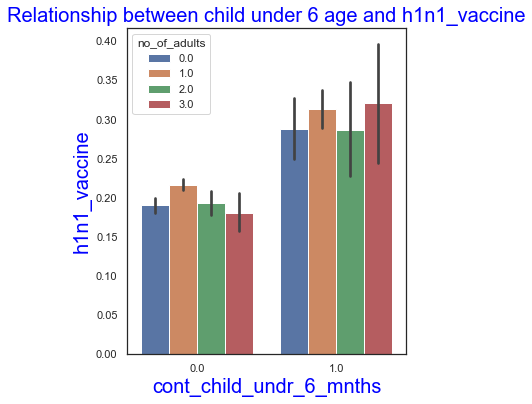

In [447]:
fig,ax=plt.subplots(figsize=(5,6))
ax.set_title('Relationship between child under 6 age and h1n1_vaccine',fontdict={'fontsize':20,'color':'blue'})
plt.xlabel(xlabel='cont_child_undr_6_mnths',fontdict={'fontsize':20,'color':'blue'})
plt.ylabel(ylabel='h1n1_vaccine',fontdict={'fontsize':20,'color':'blue'})
sns.barplot(x='cont_child_undr_6_mnths',y='h1n1_vaccine',hue='no_of_adults',data=numerical_features)
plt.show()

In [448]:
numerical_features['is_h1n1_vacc_effective'].value_counts(normalize=True)

4.0    0.452091
5.0    0.268319
3.0    0.176845
2.0    0.069570
1.0    0.033175
Name: is_h1n1_vacc_effective, dtype: float64

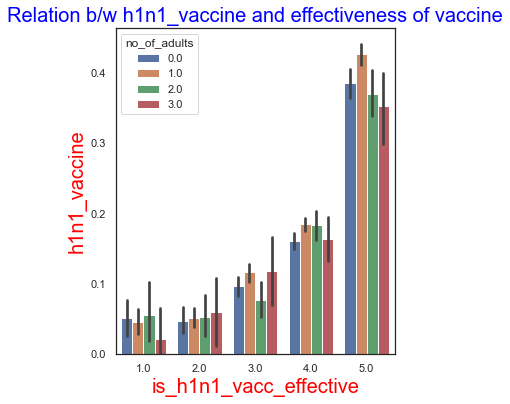

In [449]:
fig,ax=plt.subplots(figsize=(5,6))
ax.set_title('Relation b/w h1n1_vaccine and effectiveness of vaccine',fontdict={'fontsize':20,'color':'blue'})
plt.xlabel(xlabel='is_h1n1_vacc_effective',fontdict={'fontsize':20,'color':'red'})
plt.ylabel(ylabel='h1n1_vaccine',fontdict={'fontsize':20,'color':'red'})
sns.barplot(x='is_h1n1_vacc_effective',y='h1n1_vaccine',hue='no_of_adults',data=numerical_features)
plt.show()

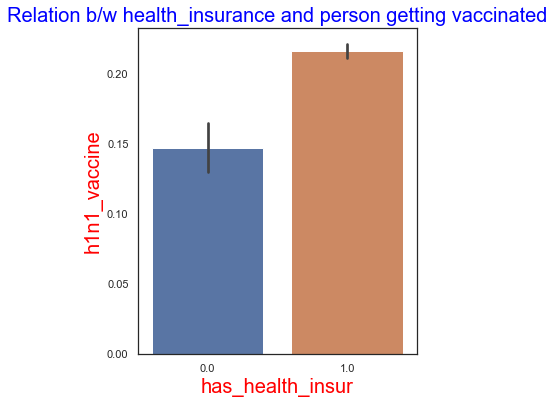

In [450]:
fig,ax=plt.subplots(figsize=(5,6))
ax.set_title('Relation b/w health_insurance and person getting vaccinated',fontdict={'fontsize':20,'color':'blue'})
plt.xlabel(xlabel='has_health_insur',fontdict={'fontsize':20,'color':'red'})
plt.ylabel(ylabel='h1n1_vaccine',fontdict={'fontsize':20,'color':'red'})
sns.barplot(x='has_health_insur',y='h1n1_vaccine',data=numerical_features)
plt.show()

In [451]:
numerical_features.groupby('h1n1_vaccine')['is_h1n1_risky'].value_counts(normalize=True)

h1n1_vaccine  is_h1n1_risky
0             2.0              0.406742
              1.0              0.352779
              4.0              0.155898
              3.0              0.043883
              5.0              0.040698
1             4.0              0.372753
              2.0              0.308777
              5.0              0.157561
              1.0              0.126718
              3.0              0.034191
Name: is_h1n1_risky, dtype: float64

checking the relationship between h1n1_vaccine and risky_factor

1. The risk_level decreases as we vaccinate ourselves
2. The risk_level increase when the person is not aware about the situation like we see in Category 1 and Category 2 Where
risk_factor is the highest.

In [452]:
numerical_features.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine'],
      dtype='object')

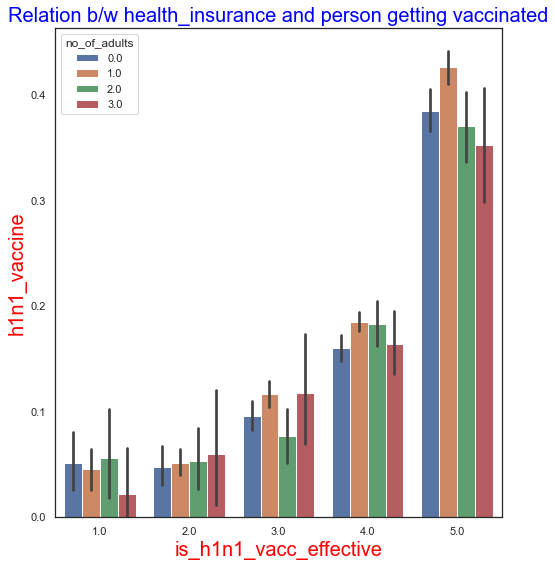

In [453]:
fig,ax=plt.subplots(figsize=(8,9))
ax.set_title('Relation b/w health_insurance and person getting vaccinated',fontdict={'fontsize':20,'color':'blue'})
plt.xlabel(xlabel='is_h1n1_vacc_effective',fontdict={'fontsize':20,'color':'red'})
plt.ylabel(ylabel='h1n1_vaccine',fontdict={'fontsize':20,'color':'red'})
sns.barplot(x='is_h1n1_vacc_effective',y='h1n1_vaccine',hue='no_of_adults',data=numerical_features)
plt.show()

<AxesSubplot:xlabel='is_h1n1_risky', ylabel='sick_from_h1n1_vacc'>

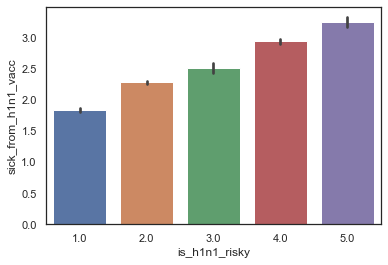

In [454]:
sns.barplot(x='is_h1n1_risky',y='sick_from_h1n1_vacc',data=numerical_features)

In [455]:
numerical_features['no_of_adults'].value_counts(normalize=True)

1.0    0.551279
0.0    0.301644
2.0    0.104954
3.0    0.042124
Name: no_of_adults, dtype: float64

<AxesSubplot:xlabel='h1n1_vaccine', ylabel='is_h1n1_vacc_effective'>

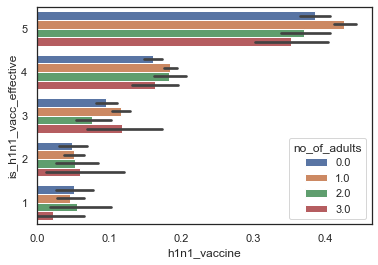

In [456]:
sns.barplot(x='h1n1_vaccine',y='is_h1n1_vacc_effective',hue='no_of_adults',orient='h',order=[5,4,3,2,1],data=numerical_features)

<AxesSubplot:xlabel='sick_from_h1n1_vacc', ylabel='h1n1_vaccine'>

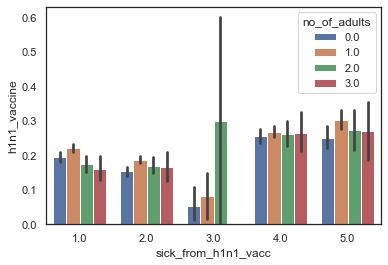

In [457]:
sns.barplot(x='sick_from_h1n1_vacc',y='h1n1_vaccine',hue='no_of_adults',data=numerical_features)

In [458]:
#Seasonal Vaccine(UnExplored Topics)
#Doing EDA For categorical Features
categorical_features.columns

Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype='object')

In [459]:
def unique_and_counts(dataframe,columns):
    dataframe=dataframe[columns].unique()
    return dataframe

In [460]:
print('Age Bracket unique values')
print(unique_and_counts(categorical_features,'age_bracket'))
print('Qualification unique values')
print(unique_and_counts(categorical_features,'qualification'))
print('race unique values')
print(unique_and_counts(categorical_features,'sex'))
print('income_level unique values')
print(unique_and_counts(categorical_features,'income_level'))
print('marital_status unique_values')
print(unique_and_counts(categorical_features,'marital_status'))
print('housing_status unique values')
print(unique_and_counts(categorical_features,'housing_status'))
print('employment unique values')
print(unique_and_counts(categorical_features,'employment'))
print('census_msa unique_values')
print(unique_and_counts(categorical_features,'census_msa'))

Age Bracket unique values
['55 - 64 Years' '35 - 44 Years' '18 - 34 Years' '65+ Years'
 '45 - 54 Years']
Qualification unique values
['< 12 Years' '12 Years' 'College Graduate' 'Some College' nan]
race unique values
['Female' 'Male']
income_level unique values
['Below Poverty' '<= $75,000, Above Poverty' '> $75,000' nan]
marital_status unique_values
['Not Married' 'Married' nan]
housing_status unique values
['Own' 'Rent' nan]
employment unique values
['Not in Labor Force' 'Employed' 'Unemployed' nan]
census_msa unique_values
['Non-MSA' 'MSA, Not Principle  City' 'MSA, Principle City']


In [461]:
#Checking the missing values in the categorical features
categorical_features.isnull().sum()/len(df)*100

age_bracket        0.000000
qualification      5.268282
race               0.000000
sex                0.000000
income_level      16.561201
marital_status     5.272026
housing_status     7.645936
employment         5.477965
census_msa         0.000000
dtype: float64

In [462]:
categorical_features['qualification'].fillna('Others',inplace=True)

c:\users\asif\appdata\local\programs\python\python38\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [463]:
categorical_features['qualification'].value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Others               1407
Name: qualification, dtype: int64

In [464]:
categorical_features['race'].value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

In [465]:
categorical_features['race'].fillna('Other or Multiple',inplace=True)

In [466]:
categorical_features['race'].value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

In [467]:
categorical_features['race'].isnull().sum()

0

In [468]:
categorical_features['income_level'].value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_level, dtype: int64

In [469]:
categorical_features['income_level'].fillna('Not Known',inplace=True)

In [470]:
categorical_features['income_level'].value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
Not Known                     4423
Below Poverty                 2697
Name: income_level, dtype: int64

In [471]:
categorical_features['marital_status'].fillna(categorical_features['marital_status'].mode()[0],inplace=True)

In [472]:
categorical_features['marital_status'].value_counts()

Married        14963
Not Married    11744
Name: marital_status, dtype: int64

In [473]:
df['race'].unique()

array(['White', 'Black', 'Other or Multiple', 'Hispanic'], dtype=object)

In [474]:
categorical_features.dropna(subset=['housing_status','employment'],inplace=True)

<ipython-input-474-07c5ed4d3ce3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_features.dropna(subset=['housing_status','employment'],inplace=True)


In [475]:
categorical_features.isnull().sum()

age_bracket       0
qualification     0
race              0
sex               0
income_level      0
marital_status    0
housing_status    0
employment        0
census_msa        0
dtype: int64

In [476]:
categorical_features.dtypes

age_bracket       object
qualification     object
race              object
sex               object
income_level      object
marital_status    object
housing_status    object
employment        object
census_msa        object
dtype: object

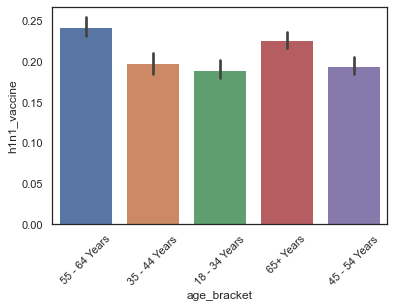

In [477]:
sns.barplot(x='age_bracket',y='h1n1_vaccine',data=df1)
plt.xticks(rotation=45)
plt.show()

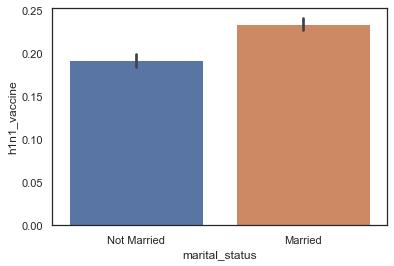

In [478]:
sns.barplot(x='marital_status',y='h1n1_vaccine',data=df1)
plt.show()

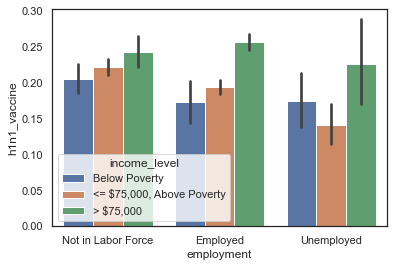

In [479]:
sns.barplot(x='employment',y='h1n1_vaccine',hue='income_level',data=df1)
plt.show()

In [480]:
numeric=numerical_features[numerical_features['no_of_adults']>0]

In [481]:
numeric

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,3.0,1.0,1.0,4.0,1.0,2.0,2.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,1.0,3.0,3.0,2.0,3.0,1.0,4.0,1.0,0.0,0
5,5,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,5.0,2.0,1.0,5.0,4.0,4.0,2.0,3.0,0
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,5.0,2.0,1.0,4.0,2.0,1.0,2.0,0.0,1
8,8,0.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,1.0,4.0,1.0,1.0,4.0,2.0,1.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26700,26700,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,4.0,2.0,5.0,5.0,4.0,5.0,1.0,0.0,0
26701,26701,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,4.0,2.0,4.0,4.0,2.0,4.0,3.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,4.0,2.0,2.0,5.0,1.0,1.0,1.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,3.0,1.0,2.0,2.0,1.0,2.0,1.0,0.0,0


In [482]:
numeric.reset_index(inplace=True)

In [483]:
numeric.drop(['unique_id'],axis=1,inplace=True)

c:\users\asif\appdata\local\programs\python\python38\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [484]:
numeric.shape

(18651, 25)

In [485]:
categorical_features.columns

Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype='object')

In [486]:
categorical_features['age_bracket'].unique()

array(['55 - 64 Years', '35 - 44 Years', '18 - 34 Years', '65+ Years',
       '45 - 54 Years'], dtype=object)

In [487]:
categorical_features.columns

Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype='object')

In [488]:
def label_categorical(dataframe,columns):
    label_encoder=preprocessing.LabelEncoder()
    dataframe[columns]=label_encoder.fit_transform(dataframe[columns])
    return dataframe

In [489]:
categorical_features['age_bracket']

0        55 - 64 Years
1        35 - 44 Years
2        18 - 34 Years
3            65+ Years
4        45 - 54 Years
             ...      
26701    18 - 34 Years
26702        65+ Years
26703    18 - 34 Years
26705    18 - 34 Years
26706        65+ Years
Name: age_bracket, Length: 24558, dtype: object

In [490]:
categorical_features['age_bracket'].head(10)

0    55 - 64 Years
1    35 - 44 Years
2    18 - 34 Years
3        65+ Years
4    45 - 54 Years
5        65+ Years
6    55 - 64 Years
7    45 - 54 Years
8    45 - 54 Years
9    55 - 64 Years
Name: age_bracket, dtype: object

In [491]:
np.array(label_encoder_cat[1:10])

array([1, 0, 4, 2, 4, 3, 2, 2, 3])

In [492]:
categorical_features.columns

Index(['age_bracket', 'qualification', 'race', 'sex', 'income_level',
       'marital_status', 'housing_status', 'employment', 'census_msa'],
      dtype='object')

In [493]:
#categorical_features['qualification']=label_categorical(categorical_features,'qualification')
#categorical_features['race']=label_categorical(categorical_features,'race')
#categorical_features['sex']=label_categorical(categorical_features,'sex')
#categorical_features['income_level']=label_categorical(categorical_features,'income_level')
#categorical_features['marital_status']=label_categorical(categorical_features,'marital_status')
#categorical_features['housing_status']=label_categorical(categorical_features,'housing_status')
#categorical_features['employment']=label_categorical(categorical_features,'employment')
#categorical_features['census_msa']=label_categorical(categorical_features,'census_msa')

In [494]:
categorical_features.head()

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA
1,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City"
2,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City"
3,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City"
4,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City"


In [495]:
categorical_features.isnull().sum()

age_bracket       0
qualification     0
race              0
sex               0
income_level      0
marital_status    0
housing_status    0
employment        0
census_msa        0
dtype: int64

In [496]:
print(categorical_features.nunique())

age_bracket       5
qualification     5
race              4
sex               2
income_level      4
marital_status    2
housing_status    2
employment        3
census_msa        3
dtype: int64


In [497]:
#categorical_features=label_categorical(categorical_features,'sex')
categorical_features=label_categorical(categorical_features,'age_bracket')
categorical_features=label_categorical(categorical_features,'qualification')
categorical_features=label_categorical(categorical_features,'race')
categorical_features=label_categorical(categorical_features,'income_level')
categorical_features=label_categorical(categorical_features,'marital_status')
categorical_features=label_categorical(categorical_features,'housing_status')
categorical_features=label_categorical(categorical_features,'employment')
categorical_features=label_categorical(categorical_features,'census_msa')

<ipython-input-488-88aa0b9bf3a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[columns]=label_encoder.fit_transform(dataframe[columns])


In [498]:
categorical_features.head()

,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,3,1,3,Female,2,1,0,1,2
1,1,0,3,Male,2,1,1,0,0
2,0,2,3,Male,0,1,0,0,0
3,4,0,3,Female,2,1,1,1,1
4,2,4,3,Female,0,0,0,0,0


In [499]:
categorical_features['employment'].unique()

array([1, 0, 2])

In [500]:
#Exploring target columns
numerical_features['h1n1_vaccine'].value_counts(normalize=True)

0    0.787546
1    0.212454
Name: h1n1_vaccine, dtype: float64

In [501]:
numerical_features.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
no_of_adults                 float64
no_of_children               float64
h1n1_vaccine                   int64
dtype: object

In [502]:
df_2=pd.concat([numerical_features,categorical_features],axis=1)

In [503]:
df_2

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,h1n1_vaccine,age_bracket,qualification,race,sex,income_level,marital_status,housing_status,employment,census_msa
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,3.0,1.0,3.0,Female,2.0,1.0,0.0,1.0,2.0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0,1.0,0.0,3.0,Male,2.0,1.0,1.0,0.0,0.0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0.0,2.0,3.0,Male,0.0,1.0,0.0,0.0,0.0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,4.0,0.0,3.0,Female,2.0,1.0,1.0,1.0,1.0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,2.0,4.0,3.0,Female,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0,4.0,4.0,3.0,Female,0.0,1.0,0.0,1.0,2.0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0.0,2.0,3.0,Male,0.0,1.0,1.0,0.0,1.0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0.0,4.0,1.0,Female,0.0,0.0,1.0,0.0,2.0


In [504]:
df_2.isnull().sum()

unique_id                       0
h1n1_worry                      0
h1n1_awareness                  0
antiviral_medication            0
contact_avoidance               0
bought_face_mask                0
wash_hands_frequently           0
avoid_large_gatherings          0
reduced_outside_home_cont       0
avoid_touch_face                0
dr_recc_h1n1_vacc               0
dr_recc_seasonal_vacc           0
chronic_medic_condition         0
cont_child_undr_6_mnths         0
is_health_worker                0
has_health_insur                0
is_h1n1_vacc_effective          0
is_h1n1_risky                   0
sick_from_h1n1_vacc             0
is_seas_vacc_effective          0
is_seas_risky                   0
sick_from_seas_vacc             0
no_of_adults                    0
no_of_children                  0
h1n1_vaccine                    0
age_bracket                  2149
qualification                2149
race                         2149
sex                          2149
income_level  

In [505]:
df_2.dropna(axis=1,inplace=True)

In [506]:
df_2.shape

(26707, 25)

In [507]:
df_2.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

In [508]:
df_2.drop(['unique_id'],axis=1,inplace=True)

In [509]:
df_2.columns

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine'],
      dtype='object')

# TRAIN_TEST_SPLIT

In [510]:
#Splitting the data into independent and dependent features
X=df_2.drop(['h1n1_vaccine'],axis=1)
y=df_2['h1n1_vaccine']

In [511]:
X_train,X_test,y_train,y_test=model_selection.train_test_split(X,y,test_size=0.2,random_state=1)
print('The training shape of the data=',X_train.shape,y_train.shape)
print('The testing shape of the data=',X_test.shape,y_test.shape)

The training shape of the data= (21365, 23) (21365,)
The testing shape of the data= (5342, 23) (5342,)


# CREATING THE FIRST MODEL(LOGISTIC REGRESSION) USING MODULAR APPROACH

In [556]:
class Classification:
    def __init__(self,Model):
        print('----Model Building----')
        print()
        print('-----BASE MODEL RESULTS')
        self.Model=Model
    
    def fit_data(self,data,targets):
        print()
        print('----Fitting the Data to the Model')
        self.Model=self.Model.fit(data,targets)
        return self.Model
    
    def predict_data(self,data):
        print()
        self.y_pred=self.Model.predict(data)
    def result_training_data(self,y_true,y_pred):
            print()
            print('-----RESULT OF TRAINING DATA-----')
            print()
            print('-----Accuracy score for Training Data-----')
            accuracy_score_train=metrics.accuracy_score(y_true,self.Model.predict(y_pred))
            print(accuracy_score_train)
            print()
            print('-----Confusion Matrix for Training Data-----')
            print()
            confusion_matrix_train=metrics.confusion_matrix(y_true,self.Model.predict(y_pred))
            print(confusion_matrix_train)
            print()
            print('-----Classification Report of Training Data-----')
            classification_report_train=metrics.classification_report(y_true,self.Model.predict(y_pred))
            print(classification_report_train)
            print()
            print('-----roc_auc_score of Training Data------')
            roc_auc_score_train=metrics.roc_auc_score(y_true,self.Model.predict(y_pred))
            print(roc_auc_score_train)
            print()
    def result_testing_data(self,y_true,y_pred):
            print('-----RESULT OF TESTING DATA-----')
            print('-----Accuracy score for Testing Data-----')
            accuracy_score_test=metrics.accuracy_score(y_true,self.y_pred)
            print(accuracy_score_test)
            print()
            print('-----Confusion Matrix for Testing Data-----')
            confusion_matrix_test=metrics.confusion_matrix(y_true,self.y_pred)
            print(confusion_matrix_test)
            print()
            print('-----Classification Report of Testing Data-----')
            classification_report_test=metrics.classification_report(y_true,self.y_pred)
            print(classification_report_test)
            print()
            print('-----roc_auc_score of Testing Data------')
            roc_auc_score_test=metrics.roc_auc_score(y_true,self.y_pred)
            print(roc_auc_score_test)
            print()
    def params_tune(self,param_grid):
        print('-----TUNED MODEL RESULTS')
        print()
        print('----SETTING THE PARAMS-------')
        self.param_grid=param_grid
        return self.param_grid

    def fit_data_tune(self,features,targets):
        print('----FITTING THE MODEL-----')
        self.Model=model_selection.GridSearchCV(self.Model,param_grid=self.param_grid,scoring='f1',cv=5,verbose=3,n_jobs=-1)
        self.Model=self.Model.fit(features,targets)
        return self.Model
    
    def predict_data_tune(self,data):
        print('----PREDICTING THE MODEL----')
        self.y_pred=self.Model.predict(data)
    
    def result_training_data_tune(self,y_true,y_pred):
        print()
        print('-----RESULT OF TRAINING DATA-----')
        print()
        print('-----Accuracy score for Training Data-----')
        accuracy_score_train=metrics.accuracy_score(y_true,self.Model.predict(y_pred))
        print(accuracy_score_train)
        print()
        print('-----Confusion Matrix for Training Data-----')
        print()
        confusion_matrix_train=metrics.confusion_matrix(y_true,self.Model.predict(y_pred))
        print(confusion_matrix_train)
        print()
        print('-----Classification Report of Training Data-----')
        classification_report_train=metrics.classification_report(y_true,self.Model.predict(y_pred))
        print(classification_report_train)
        print()
        print('-----roc_auc_score of Training Data------')
        roc_auc_score_train=metrics.roc_auc_score(y_true,self.Model.predict(y_pred))
        print(roc_auc_score_train)
        print()
    def result_testing_data_tune(self,y_true,y_pred):
        print('-----RESULT OF TESTING DATA-----')
        print('-----Accuracy score for Testing Data-----')
        accuracy_score_test=metrics.accuracy_score(y_true,self.y_pred)
        print(accuracy_score_test)
        print()
        print('-----Confusion Matrix for Testing Data-----')
        confusion_matrix_test=metrics.confusion_matrix(y_true,self.y_pred)
        print(confusion_matrix_test)
        print()
        print('-----Classification Report of Testing Data-----')
        classification_report_test=metrics.classification_report(y_true,self.y_pred)
        print(classification_report_test)
        print()
        print('-----roc_auc_score of Testing Data------')
        roc_auc_score_test=metrics.roc_auc_score(y_true,self.y_pred)
        print(roc_auc_score_test)
        print()

In [565]:
#Logistic Regression Model Create and Tuned The Model
Logistic_Model=Classification(linear_model.LogisticRegression(class_weight={0:1,1:4}))
Logistic_Model.fit_data(X_train,y_train)
y_pred_logistic=Logistic_Model.predict_data(X_test)
Logistic_Model.result_training_data(y_train,X_train)
Logistic_Model.result_testing_data(y_test,y_pred_logistic)
Logistic_Model_tune=Classification(linear_model.LogisticRegression(random_state=1,class_weight={0:1,1:4}))
Logistic_Model_tune.params_tune(param_grid={
    'penalty':['l1', 'l2','elasticnet', 'none'],
    'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
})
Logistic_Model_tune.fit_data_tune(X_train,y_train)
y_pred_tune=Logistic_Model_tune.predict_data_tune(X_test)
Logistic_Model_tune.result_training_data_tune(y_train,X_train)
Logistic_Model_tune.result_testing_data_tune(y_test,y_pred_tune)

----Model Building----

-----BASE MODEL RESULTS

----Fitting the Data to the Model


c:\users\asif\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




-----RESULT OF TRAINING DATA-----

-----Accuracy score for Training Data-----
0.7648022466651064

-----Confusion Matrix for Training Data-----

[[12986  3827]
 [ 1198  3354]]

-----Classification Report of Training Data-----
              precision    recall  f1-score   support

           0       0.92      0.77      0.84     16813
           1       0.47      0.74      0.57      4552

    accuracy                           0.76     21365
   macro avg       0.69      0.75      0.70     21365
weighted avg       0.82      0.76      0.78     21365


-----roc_auc_score of Training Data------
0.7545987486459396

-----RESULT OF TESTING DATA-----
-----Accuracy score for Testing Data-----
0.77311868214152

-----Confusion Matrix for Testing Data-----
[[3290  930]
 [ 282  840]]

-----Classification Report of Testing Data-----
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      4220
           1       0.47      0.75      0.58      1122

    ac

c:\users\asif\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan 0.57034865        nan 0.57056899 0.57037588
 0.57027651 0.57018222 0.57037588 0.57032822        nan        nan
        nan        nan        nan 0.57049753 0.57044829        nan
 0.57044829 0.57035206]
  warnings.warn(


----PREDICTING THE MODEL----

-----RESULT OF TRAINING DATA-----

-----Accuracy score for Training Data-----
0.7646618300959513

-----Confusion Matrix for Training Data-----

[[12984  3829]
 [ 1199  3353]]

-----Classification Report of Training Data-----
              precision    recall  f1-score   support

           0       0.92      0.77      0.84     16813
           1       0.47      0.74      0.57      4552

    accuracy                           0.76     21365
   macro avg       0.69      0.75      0.70     21365
weighted avg       0.82      0.76      0.78     21365


-----roc_auc_score of Training Data------
0.7544294290331244

-----RESULT OF TESTING DATA-----
-----Accuracy score for Testing Data-----
0.7734930737551479

-----Confusion Matrix for Testing Data-----
[[3292  928]
 [ 282  840]]

-----Classification Report of Testing Data-----
              precision    recall  f1-score   support

           0       0.92      0.78      0.84      4220
           1       0.48      0.

In [566]:
#DecisionTree Model Created and Tuned Model
decision_model=Classification(DecisionTreeClassifier(class_weight={0:1,1:4},random_state=1))
decision_model.fit_data(X_train,y_train)
y_dec=decision_model.predict_data(X_test)
decision_model.result_training_data(y_train,X_train)
decision_model.result_testing_data(y_test,y_dec)
decision_Model_tune=Classification(DecisionTreeClassifier(class_weight={0:1,1:4},random_state=1))
decision_Model_tune.params_tune({
    'max_depth':np.arange(2,10,1),
    'min_samples_split':np.arange(2,6,1),
    'min_samples_leaf':np.arange(1,6,1)
})
decision_Model_tune.fit_data_tune(X_train,y_train)
y_pred_tune_dec=decision_Model_tune.predict_data_tune(X_test)
decision_Model_tune.result_training_data_tune(y_train,X_train)
decision_Model_tune.result_testing_data_tune(y_test,y_pred_tune_dec)

----Model Building----

-----BASE MODEL RESULTS

----Fitting the Data to the Model


-----RESULT OF TRAINING DATA-----

-----Accuracy score for Training Data-----
0.9919494500351042

-----Confusion Matrix for Training Data-----

[[16645   168]
 [    4  4548]]

-----Classification Report of Training Data-----
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     16813
           1       0.96      1.00      0.98      4552

    accuracy                           0.99     21365
   macro avg       0.98      0.99      0.99     21365
weighted avg       0.99      0.99      0.99     21365


-----roc_auc_score of Training Data------
0.994564498744956

-----RESULT OF TESTING DATA-----
-----Accuracy score for Testing Data-----
0.757581430175964

-----Confusion Matrix for Testing Data-----
[[3564  656]
 [ 639  483]]

-----Classification Report of Testing Data-----
              precision    recall  f1-score   support

           0       0.85      0.8

In [572]:
rf_model=Classification(ensemble.RandomForestClassifier(random_state=1))
rf_model.fit_data(X_train,y_train)
y_pred_rf=rf_model.predict_data(X_test)
rf_model.result_training_data(y_train,X_train)
rf_model.result_testing_data(y_test,y_pred_rf)
rf_model_tune=Classification(ensemble.RandomForestClassifier(random_state=1))
rf_model_tune.params_tune({
    'n_estimators':np.arange(100,500,100),
    'max_depth':np.arange(2,8,1),
    'min_samples_split':np.arange(2,6,1),
    'min_samples_leaf':np.arange(1,6,1)
})
rf_model_tune.fit_data_tune(X_train,y_train)
y_pred_rf_tune=rf_model_tune.predict_data_tune(X_test)
rf_model_tune.result_training_data_tune(y_train,X_train)
rf_model_tune.result_testing_data_tune(y_test,y_pred_rf_tune)

----Model Building----

-----BASE MODEL RESULTS

----Fitting the Data to the Model


-----RESULT OF TRAINING DATA-----

-----Accuracy score for Training Data-----
0.9941961151415867

-----Confusion Matrix for Training Data-----

[[16782    31]
 [   93  4459]]

-----Classification Report of Training Data-----
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     16813
           1       0.99      0.98      0.99      4552

    accuracy                           0.99     21365
   macro avg       0.99      0.99      0.99     21365
weighted avg       0.99      0.99      0.99     21365


-----roc_auc_score of Training Data------
0.9888628043493418

-----RESULT OF TESTING DATA-----
-----Accuracy score for Testing Data-----
0.8339573193560464

-----Confusion Matrix for Testing Data-----
[[3977  243]
 [ 644  478]]

-----Classification Report of Testing Data-----
              precision    recall  f1-score   support

           0       0.86      0

In [523]:
MLA=[
    linear_model.LogisticRegression(class_weight={0:1,1:3}),
    ensemble.AdaBoostClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(class_weight={0:1,1:3}),
    DecisionTreeClassifier(class_weight={0:1,1:3}),
]

In [524]:

MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


row_index = 0
for alg in MLA:
    
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = metrics.roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index,'Model_Name'] = MLA_name
    MLA_compare.loc[row_index, 'Train_Accuracy'] = round(alg.score(X_train, y_train), 2)
    MLA_compare.loc[row_index, 'Test_Accuracy'] = round(alg.score(X_test, y_test), 2)
    MLA_compare.loc[row_index, 'Precision_Test'] = round(metrics.precision_score(y_test, predicted),2)
    MLA_compare.loc[row_index,'Recall_Test']=round(metrics.recall_score(y_test,predicted),2)
    MLA_compare.loc[row_index, 'F1_Score_Test']=round(metrics.f1_score(y_test,predicted),2)
    MLA_compare.loc[row_index,'ROC_AUC_Score_Test']=round(metrics.roc_auc_score(y_test,predicted),2)
    row_index+=1
    
MLA_compare.sort_values(by = ['Test_Accuracy'], ascending = True, inplace = True)    
MLA_compare

,Model_Name,Train_Accuracy,Test_Accuracy,Precision_Test,Recall_Test,F1_Score_Test,ROC_AUC_Score_Test
5,DecisionTreeClassifier,0.99,0.76,0.43,0.44,0.44,0.65
0,LogisticRegression,0.80,0.80,0.52,0.69,0.60,0.76
2,ExtraTreesClassifier,0.99,0.83,0.63,0.42,0.50,0.68
4,RandomForestClassifier,0.99,0.83,0.65,0.40,0.49,0.67
1,AdaBoostClassifier,0.83,0.84,0.71,0.42,0.53,0.69
3,GradientBoostingClassifier,0.84,0.84,0.71,0.44,0.54,0.70


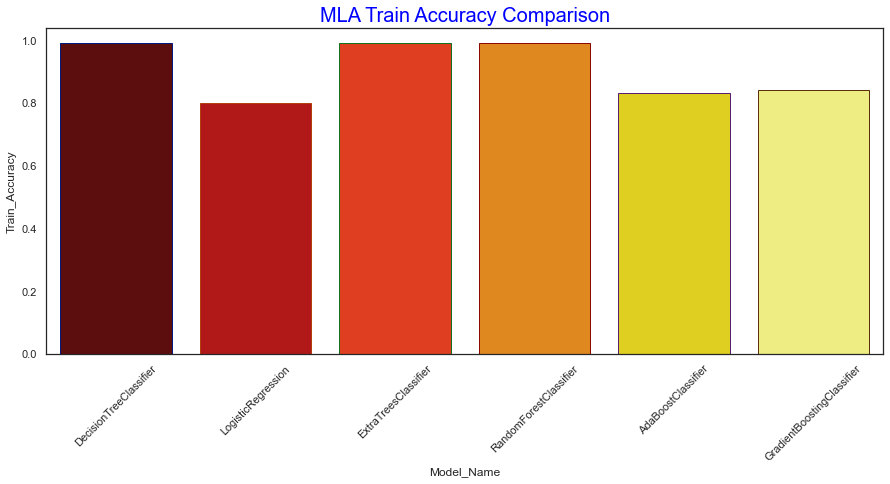

In [525]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Model_Name", y="Train_Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=45)
plt.title('MLA Train Accuracy Comparison',fontdict={'fontsize':20,'color':'blue'})
plt.show()

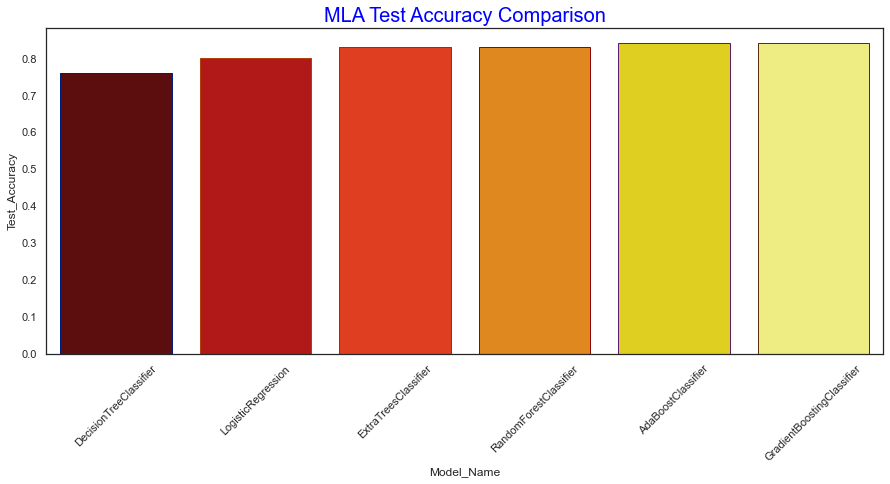

In [526]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Model_Name", y="Test_Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=45)
plt.title('MLA Test Accuracy Comparison',fontdict={'fontsize':20,'color':'blue'})
plt.show()

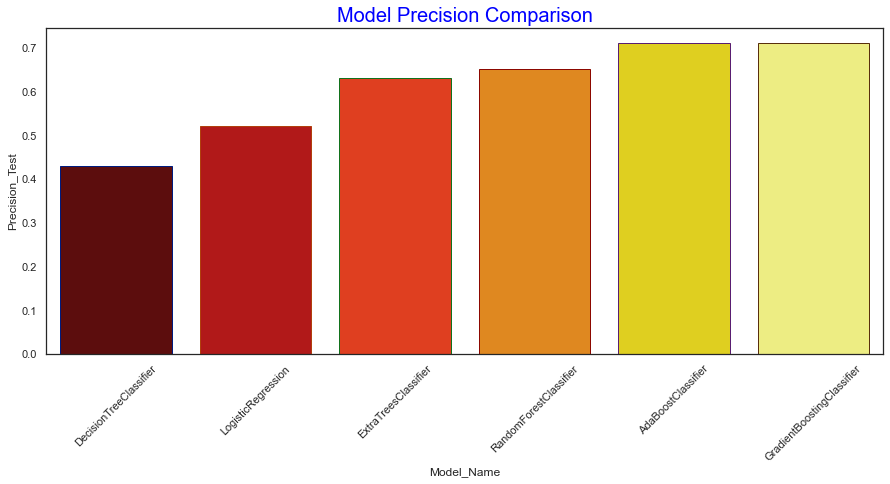

In [527]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Model_Name", y="Precision_Test",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=45)
plt.title('Model Precision Comparison',fontdict={'fontsize':20,'color':'blue'})
plt.show()

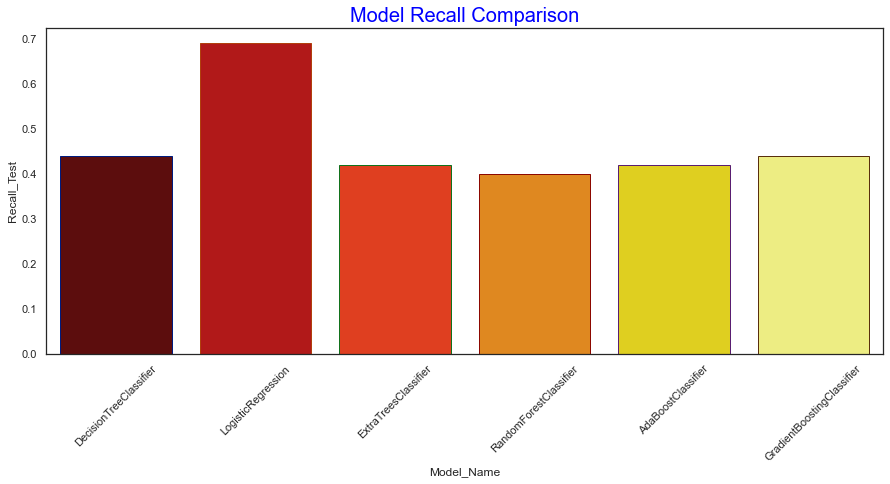

In [528]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Model_Name", y="Recall_Test",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=45)
plt.title('Model Recall Comparison',fontdict={'fontsize':20,'color':'blue'})
plt.show()

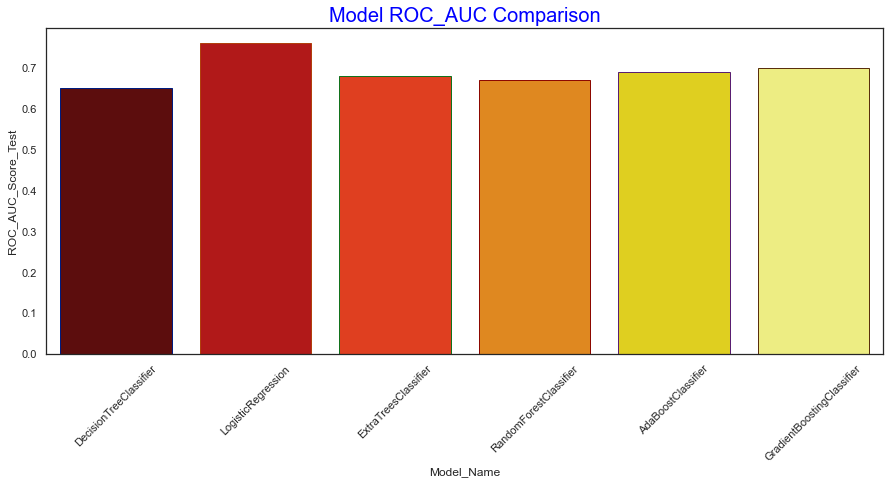

In [529]:
plt.subplots(figsize=(15,6))
sns.barplot(x="Model_Name", y="ROC_AUC_Score_Test",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=45)
plt.title('Model ROC_AUC Comparison',fontdict={'fontsize':20,'color':'blue'})
plt.show()

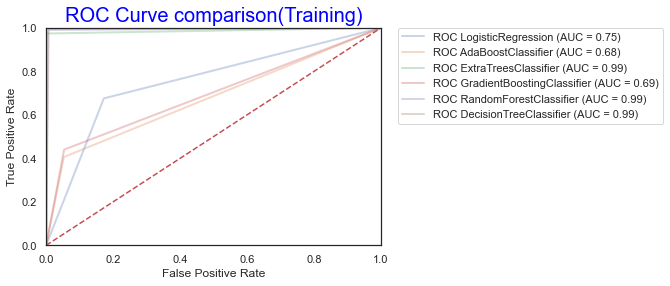

In [530]:

index = 1
for alg in MLA:
    
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = metrics.roc_curve(y_train,alg.predict(X_train))
    roc_auc_mla_train = metrics.auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla_train))
   
    index+=1

plt.title('ROC Curve comparison(Training)',fontdict={'fontsize':20,'color':'blue'})
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()

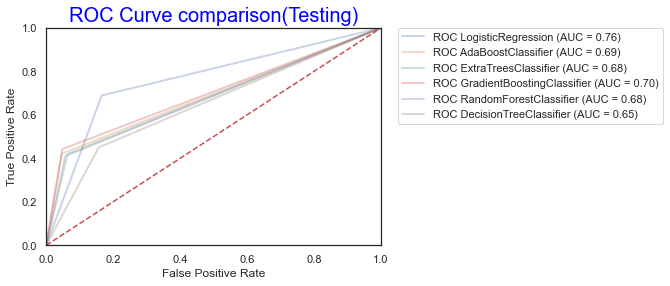

In [531]:
index = 1
for alg in MLA:
    
    
    predicted = alg.fit(X_train, y_train).predict(X_test)
    fp, tp, th = metrics.roc_curve(y_test, predicted)
    roc_auc_mla = metrics.auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

plt.title('ROC Curve comparison(Testing)',fontdict={'fontsize':20,'color':'blue'})
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()

In [ ]:
#Hyperparameter Tuning of all the model(Basic Approach)